# COVID-19 data analysis

In [12]:
!curl https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv -o deaths_global.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41343  100 41343    0     0  48017      0 --:--:-- --:--:-- --:--:-- 47961


NameError: name 'pd' is not defined

In [15]:
#keep repository update
!git pull https://github.com/pcm-dpc/COVID-19.git master --no-edit

From https://github.com/pcm-dpc/COVID-19
 * branch            master     -> FETCH_HEAD
Already up-to-date.


In [8]:
#libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [171]:
df = pd.read_csv(os.path.join('dati-andamento-nazionale',
                               'dpc-covid19-ita-andamento-nazionale.csv'))
df.data = pd.to_datetime(df.data)
#assuming terapia_intensiva (intensive care) and deceduti (deaths)
#are cumulative. It is not specified in the dataset.
#Computing Daily new cases
df['ricoverati_con_sintomi_change']=df['ricoverati_con_sintomi']-df['ricoverati_con_sintomi'].shift(1)
df['terapia_intensiva_change']=df['terapia_intensiva']-df['terapia_intensiva'].shift(1)
df['deceduti_daily']=df['deceduti']-df['deceduti'].shift(1)


#The number of deaths over the number 
#of new cases admitted in intensive care (daily)
df['not_admitted_ratio'] = df['deceduti_daily']/(df['terapia_intensiva_change'])
#The number of deaths minus the number 
#of new cases admitted in intensive care (daily)
df['not_admitted'] = df['deceduti_daily']-(df['terapia_intensiva_change'])

#remove unused
df.drop(['stato'],axis=1,inplace=True)
df.drop(['data'],axis=1).tail()

#compute log of selected columns
cols = ['nuovi_attualmente_positivi',#new positive case now
          'deceduti_daily',#today deaths
          'terapia_intensiva',#Intensive care
          'deceduti'#deaths
         ]
for c in cols:
    
    df[c+'_log']=np.log10(df[c])
df[cols+['deceduti_daily_log']].head(10)
plt.style.use('ggplot')
before = df[df['data']<'2020-03-9']
before['ndata']=date2num(before['data'])
after = df[df['data']>'2020-03-9']
after['ndata']=date2num(after['data'])

/Users/mtinti/miniconda3/envs/mixRP/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [188]:
uk_df.head()

,date,Death,Death_change,Death_change_log,ndate
43,2020-03-05,1,1.0,0.00000,737489.0
44,2020-03-06,2,1.0,0.00000,737490.0
46,2020-03-08,3,1.0,0.00000,737492.0
47,2020-03-09,4,1.0,0.00000,737493.0
48,2020-03-10,6,2.0,0.30103,737494.0


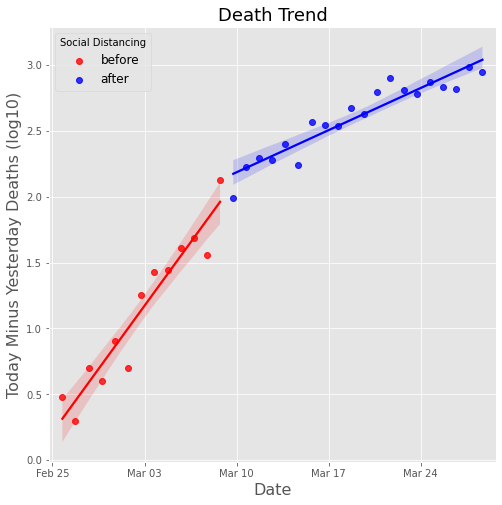

In [189]:
plt.style.use('ggplot')
before = df[df['data']<'2020-03-9']
before['ndata']=date2num(before['data'])
after = df[df['data']>'2020-03-9']
after['ndata']=date2num(after['data'])

x='ndata'
y='deceduti_daily_log'
fig,ax=plt.subplots(figsize=(8,8))
sns.regplot(x=x, y=y, color="r", data=before,ax=ax,label='before')
sns.regplot(x=x, y=y, color="b", data=after,ax=ax,label='after')
_,_=format_x_date(ax)
#plt.xticks(rotation=70,ha='right')
plt.xlabel('Date', fontsize='16')
plt.ylabel('Today Minus Yesterday Deaths (log10)',fontsize='16')
plt.title('Death Trend',fontsize='18')
plt.legend(title='Social Distancing',fontsize=12)
plt.savefig('Fig1.png')
plt.show()

In [65]:
#remove annoying worning about pandas assignment
pd.options.mode.chained_assignment = None

In [66]:
from sklearn.linear_model import LinearRegression,HuberRegressor,Ridge
lr = LinearRegression()

## Load national dataset

In [67]:
df = pd.read_csv(os.path.join('dati-andamento-nazionale',
                               'dpc-covid19-ita-andamento-nazionale.csv'))
df.data = pd.to_datetime(df.data)
#assuming terapia_intensiva (intensive care) and deceduti (deaths)
#are cumulative. It is not specified in the dataset.
#Computing Daily new cases
df['ricoverati_con_sintomi_change']=df['ricoverati_con_sintomi']-df['ricoverati_con_sintomi'].shift(1)
df['terapia_intensiva_change']=df['terapia_intensiva']-df['terapia_intensiva'].shift(1)
df['deceduti_daily']=df['deceduti']-df['deceduti'].shift(1)


#The number of deaths over the number 
#of new cases admitted in intensive care (daily)
df['not_admitted_ratio'] = df['deceduti_daily']/(df['terapia_intensiva_change'])
#The number of deaths minus the number 
#of new cases admitted in intensive care (daily)
df['not_admitted'] = df['deceduti_daily']-(df['terapia_intensiva_change'])

#remove unused
df.drop(['stato'],axis=1,inplace=True)
df.drop(['data'],axis=1).tail()

#compute log of selected columns
cols = ['nuovi_attualmente_positivi',#new positive case now
          'deceduti_daily',#today deaths
          'terapia_intensiva',#Intensive care
          'deceduti'#deaths
         ]
for c in cols:
    
    df[c+'_log']=np.log10(df[c])
df[cols+['deceduti_daily_log']].head(10)

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en,terapia_intensiva_change,deceduti_change,ricoverati_con_sintomi_change
29,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964,NaN,NaN,192.0,743.0,1245.0
30,23112,3489,26601,30920,57521,3491,9362,7503,74386,324445,NaN,NaN,93.0,683.0,1175.0
31,24753,3612,28365,33648,62013,4492,10361,8165,80539,361060,pd-IT-0007,pd-EN-0007,123.0,662.0,1641.0
32,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN,120.0,969.0,1276.0
33,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN,124.0,889.0,647.0


In [68]:
df['terapia_intensiva_change']/(df['ricoverati_con_sintomi_change']-df['terapia_intensiva_change'])

0          NaN
1     2.250000
2     0.076923
3     0.200000
4     0.089888
5     2.733333
6     0.172414
7     0.337662
8     0.275109
9     0.268293
10    0.144330
11    0.225152
12    0.690789
13    0.100851
14    0.122781
15    0.249135
16    0.232666
17    0.181951
18    0.291181
19    0.251323
20    0.135444
21    0.151310
22    0.125904
23    0.154874
24    0.209020
25    1.481132
26    0.135935
27    0.076536
28    0.299539
29    0.182336
30    0.085952
31    0.081028
32    0.103806
33    0.237094
dtype: float64

## New positives vs Days

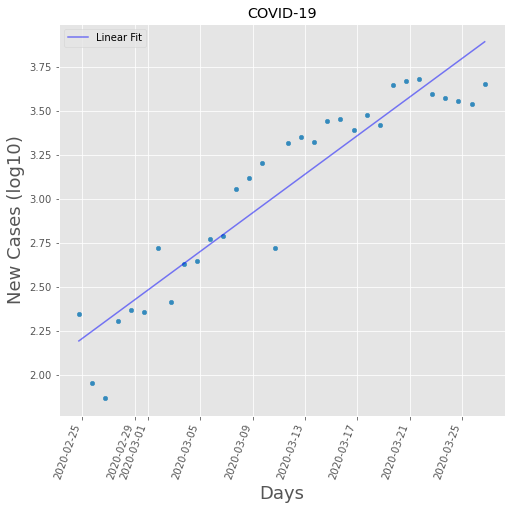

In [21]:
yR='nuovi_attualmente_positivi'
fig,ax=plt.subplots(figsize=(8,8))
df[yR+'_log']=np.log10(df[yR])
df.plot(x='data',
         y=yR+'_log',
         kind='scatter',ax=ax)

x=df['data'].values.reshape(-1, 1)
y=df[yR+'_log'].values
lr.fit(x,y )
#plt.plot(x, lr.predict(x), 'b-')
y_pred = lr.predict(df.data.values.astype(float).reshape(-1, 1))
df['y_pred']=y_pred

df.plot(x='data',
         y='y_pred',
         ax=ax,c='b',alpha=0.5,label ='Linear Fit')
plt.xticks(rotation=70,ha='right')
plt.title('COVID-19')
plt.xlabel('Days', fontsize='18')
plt.ylabel('New Cases (log10)',fontsize='18')
plt.show()

## Prediction on future cases

In [22]:
future = pd.DataFrame()
future['day'] = pd.date_range(start='2020-03-21', end='2020-03-30')
future['log_pred'] = lr.predict(future.day.values.astype(float).reshape(-1, 1))
future['new_cases'] = 10**future['log_pred']
future['new_cases']=future['new_cases'].astype(int)
future

,day,log_pred,new_cases
0,2020-03-21,3.580973,3810
1,2020-03-22,3.635944,4324
2,2020-03-23,3.690914,4908
3,2020-03-24,3.745885,5570
4,2020-03-25,3.800856,6322
5,2020-03-26,3.855826,7175
6,2020-03-27,3.910797,8143
7,2020-03-28,3.965767,9242
8,2020-03-29,4.020738,10489
9,2020-03-30,4.075709,11904


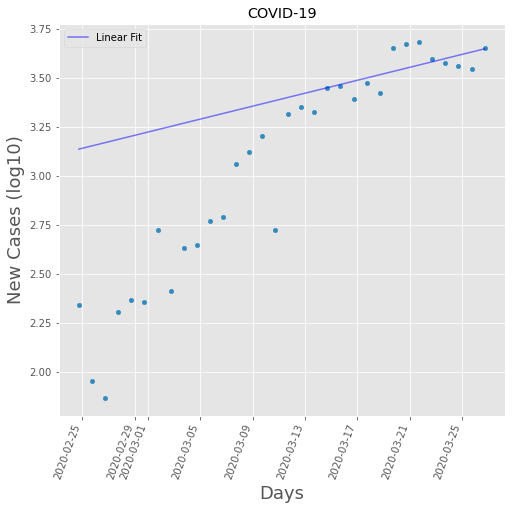

In [23]:
yR='nuovi_attualmente_positivi'
fig,ax=plt.subplots(figsize=(8,8))

df.plot(x='data',
         y=yR+'_log',
         kind='scatter',ax=ax)

x=df['data'].values.reshape(-1, 1)
y=df[yR+'_log'].values
lr.fit(x[-12:],y[-12:] )
#plt.plot(x, lr.predict(x), 'b-')
y_pred = lr.predict(df.data.values.astype(float).reshape(-1, 1))
df['y_pred']=y_pred

df.plot(x='data',
         y='y_pred',
         ax=ax,c='b',alpha=0.5,label ='Linear Fit')
plt.xticks(rotation=70,ha='right')
plt.title('COVID-19')
plt.xlabel('Days', fontsize='18')
plt.ylabel('New Cases (log10)',fontsize='18')
plt.show()

In [24]:
future = pd.DataFrame()
future['day'] = pd.date_range(start='2020-03-21', end='2020-03-30')
future['log_pred'] = lr.predict(future.day.values.astype(float).reshape(-1, 1))
future['new_cases'] = 10**future['log_pred']
future['new_cases']=future['new_cases'].astype(int)
future

,day,log_pred,new_cases
0,2020-03-21,3.553075,3573
1,2020-03-22,3.569583,3711
2,2020-03-23,3.586091,3855
3,2020-03-24,3.602599,4004
4,2020-03-25,3.619107,4160
5,2020-03-26,3.635615,4321
6,2020-03-27,3.652123,4488
7,2020-03-28,3.668631,4662
8,2020-03-29,3.685139,4843
9,2020-03-30,3.701647,5030


## Social Distance

In [25]:
df.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_attualmente_positivi', 'nuovi_attualmente_positivi',
       'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi', 'note_it',
       'note_en', 'terapia_intensiva_change', 'deceduti_change',
       'ricoverati_con_sintomi_change', 'nuovi_attualmente_positivi_log',
       'y_pred'],
      dtype='object')

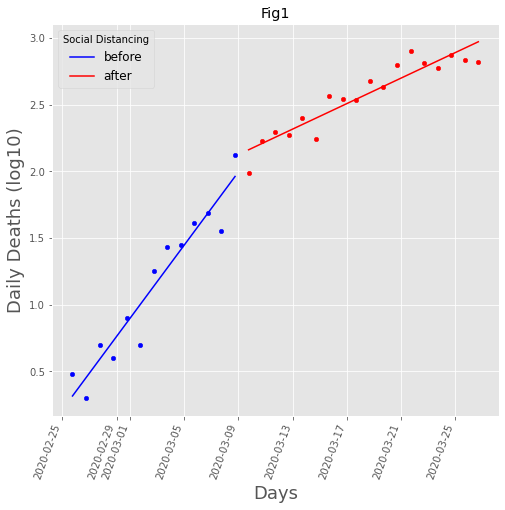

In [26]:
yR='deceduti_change'
df[yR+'_log']=np.log10(df[yR])
df=df[~df[yR+'_log'].isna()]
before = df[df['data']<'2020-03-9']
after = df[df['data']>'2020-03-9']

fig,ax=plt.subplots(figsize=(8,8))

before.plot(x='data',
         y=yR+'_log',
         kind='scatter',ax=ax,c='b')

after.plot(x='data',
         y=yR+'_log',
         kind='scatter',ax=ax,c='r')

x=before['data'].values.reshape(-1, 1)
y=before[yR+'_log'].values
lr.fit(x,y)
#plt.plot(x, lr.predict(x), 'b-')
y_pred = lr.predict(before.data.values.astype(float).reshape(-1, 1))
before.loc[:,'y_pred']=y_pred

before.plot(x='data',
         y='y_pred',
         ax=ax,c='b',label='before')

x=after['data'].values.reshape(-1, 1)
y=after[yR+'_log'].values
lr.fit(x,y )
#plt.plot(x, lr.predict(x), 'b-')
y_pred = lr.predict(after.data.values.astype(float).reshape(-1, 1))
after.loc[:,'y_pred']=y_pred

after.plot(x='data',
         y='y_pred',
         ax=ax,c='r',label='after')
plt.legend(title='Social Distancing',fontsize=12)
plt.xticks(rotation=70,ha='right')

plt.xlabel('Days', fontsize='18')
plt.ylabel('Daily Deaths (log10)',fontsize='18')
plt.title('Fig1')
plt.savefig('COVID_death_trend.png')

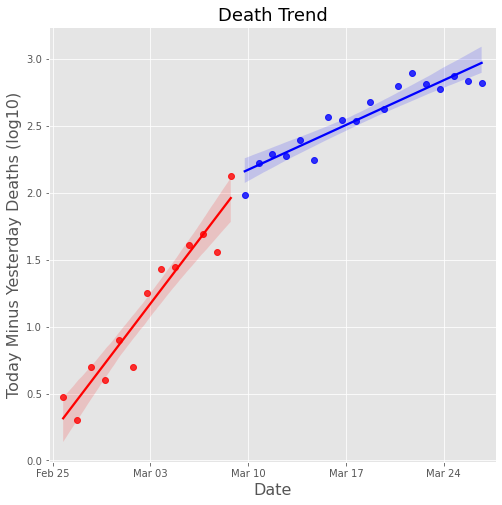

In [44]:
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

before = df[df['data']<'2020-03-9']
before['ndata']=date2num(before['data'])
after = df[df['data']>'2020-03-9']
after['ndata']=date2num(after['data'])

x='ndata'
y='deceduti_change_log'
fig,ax=plt.subplots(figsize=(8,8))
sns.regplot(x=x, y=y, color="r", data=before,ax=ax)
sns.regplot(x=x, y=y, color="b", data=after,ax=ax)

xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin-1,xmax+1)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


#plt.xticks(rotation=70,ha='right')
plt.xlabel('Date', fontsize='16')
plt.ylabel('Today Minus Yesterday Deaths (log10)',fontsize='16')
plt.title('Death Trend',fontsize='18')
plt.show()

In [28]:
yR='terapia_intensiva'
df[yR+'_log']=np.log10(df[yR])
df=df[~df[yR+'_log'].isna()]
before = df[df['data']<'2020-03-9']
after = df[df['data']>'2020-03-9']

#fig,ax=plt.subplots(figsize=(8,8))

#before.plot(x='data', y=yR+'_log', kind='scatter', ax=ax, c='b')
x='data'
y=yR+'_log',
ax =sns.regplot(x=x, y=y, color="g",ax=ax, data=before)

#after.plot(x='data',
#         y=yR+'_log',
#         kind='scatter',ax=ax,c='r')
sns.regplot(x=x, y=y, color="g",ax=ax)

#x=before['data'].values.reshape(-1, 1)
#y=before[yR+'_log'].values
#lr.fit(x,y)
#plt.plot(x, lr.predict(x), 'b-')
#y_pred = lr.predict(before.data.values.astype(float).reshape(-1, 1))
#before.loc[:,'y_pred']=y_pred

#before.plot(x='data',
#         y='y_pred',
#         ax=ax,c='b',label='before')

#x=after['data'].values.reshape(-1, 1)
#y=after[yR+'_log'].values
#lr.fit(x,y )
#plt.plot(x, lr.predict(x), 'b-')
#y_pred = lr.predict(after.data.values.astype(float).reshape(-1, 1))
#after.loc[:,'y_pred']=y_pred

#after.plot(x='data',
#         y='y_pred',
#         ax=ax,c='r',label='after')
plt.legend(title='Social Distancing',fontsize=12)
plt.xticks(rotation=70,ha='right')

plt.xlabel('Days', fontsize='18')
plt.ylabel('In Intensive Care (log10)',fontsize='18')
plt.title('COVID-19')
plt.savefig('COVID.png')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 13 and the array at index 1 has size 1

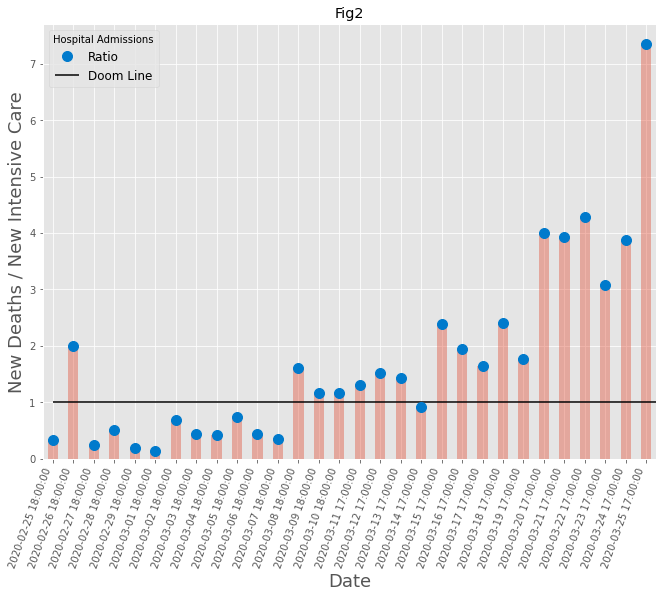

In [19]:
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#df['data']=df['data'].dt.to_period('D')
df['not_admitted'] = df['deceduti_change']/(df['terapia_intensiva_change'])
fig,ax=plt.subplots(figsize=(11,8))
df.plot(y='not_admitted',x='data',ax=ax,kind='bar',alpha=0.4,label='')
ax.plot(df['data'].index.values-1, df['not_admitted'], "o", markersize=10,
        color='#007acc', alpha=1,label='Ratio')
#df.plot(y='not_admitted',x='data',ax=ax, kind='line')
ax.hlines(1,0,df.shape[0],label='Doom Line')
plt.legend(title='Hospital Admissions',fontsize=12)


    #locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    #formatter = mdates.ConciseDateFormatter(locator)
    #ax.xaxis.set_major_locator(locator)
    #ax.xaxis.set_major_formatter(formatter)



plt.xticks(rotation=70,ha='right')


plt.xlabel('Date', fontsize='18')
plt.ylabel('New Deaths / New Intensive Care',fontsize='18')
plt.title('Fig2')


plt.savefig('COVID_admission.png')

6.0 Abruzzo
0.5 Basilicata
6.0 P.A. Bolzano
3.0 Calabria
1.8181818181818181 Campania
30.666666666666668 Emilia Romagna
4.0 Friuli Venezia Giulia
6.0 Lazio
41.0 Liguria
36.54545454545455 Lombardia
28.0 Marche
1.0 Molise
6.428571428571429 Piemonte
6.0 Puglia
4.0 Sardegna
1.0 Sicilia
3.3333333333333335 Toscana
5.0 P.A. Trento
3.0 Umbria
1.0 Valle d'Aosta
4.0 Veneto


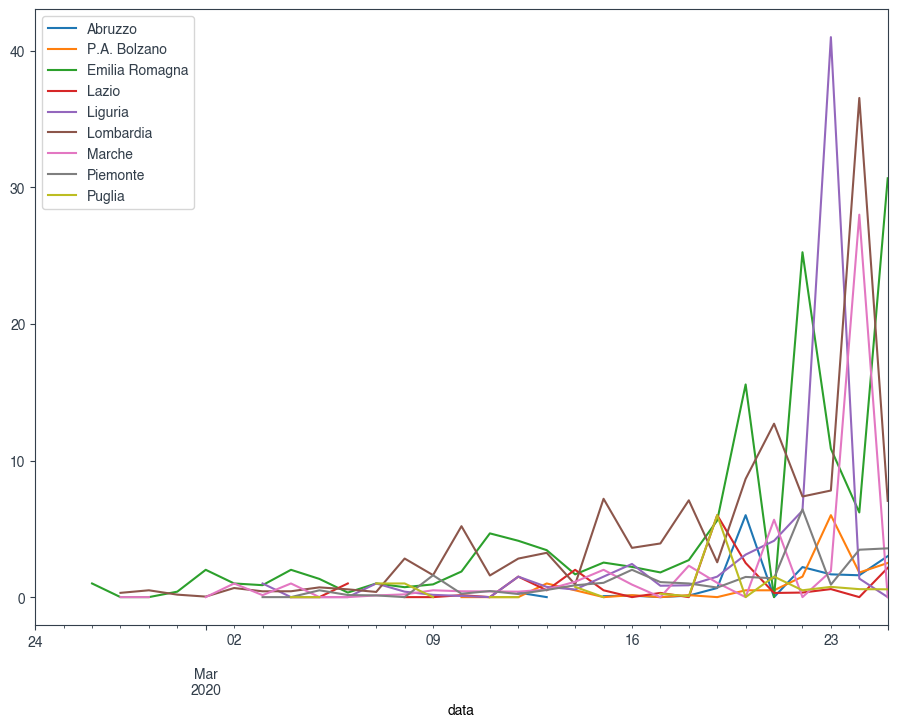

In [85]:
dfr = pd.read_csv(os.path.join('dati-regioni',
                               'dpc-covid19-ita-regioni.csv'))
dfr.data = pd.to_datetime(dfr.data)

fig,ax=plt.subplots(figsize=(11,8))
for r in dfr['denominazione_regione'].unique():
    #if r == 'Lombardia' or r == 'Emilia Romagna':
    temp = dfr[dfr['denominazione_regione']==r]
    temp=temp.sort_values('data')
    temp['terapia_intensiva_change']=temp['terapia_intensiva']-temp['terapia_intensiva'].shift(1)
    temp['deceduti_change']=temp['deceduti']-temp['deceduti'].shift(1)
    temp['not_admitted'] = temp['deceduti_change']/(temp['terapia_intensiva_change'])
    temp['data']=temp['data'].dt.to_period('D')
    temp['not_admitted'] = temp['not_admitted'].clip(lower=0).replace(np.inf,0)
    print(temp['not_admitted'].max(),r)
    if temp['not_admitted'].max() > 5:
        temp.plot(x='data',y='not_admitted',label=r,kind='line',ax=ax)
        
        #print(temp)



In [59]:
df['data'].dt.to_period('D')

1     2020-02-25
2     2020-02-26
3     2020-02-27
4     2020-02-28
5     2020-02-29
6     2020-03-01
7     2020-03-02
8     2020-03-03
9     2020-03-04
10    2020-03-05
11    2020-03-06
12    2020-03-07
13    2020-03-08
14    2020-03-09
15    2020-03-10
16    2020-03-11
17    2020-03-12
18    2020-03-13
19    2020-03-14
20    2020-03-15
21    2020-03-16
22    2020-03-17
23    2020-03-18
24    2020-03-19
25    2020-03-20
26    2020-03-21
27    2020-03-22
28    2020-03-23
29    2020-03-24
30    2020-03-25
Name: data, dtype: period[D]

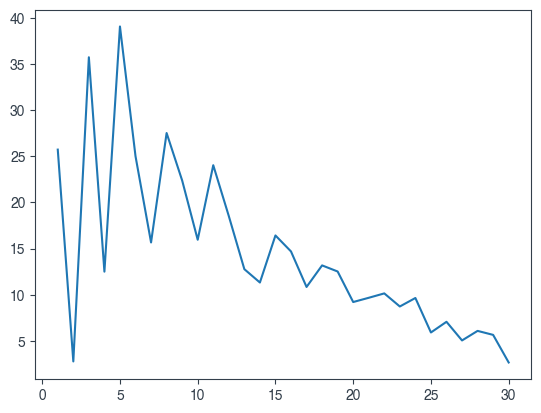

In [15]:
((df['terapia_intensiva_change']*100)/df['terapia_intensiva']).plot()

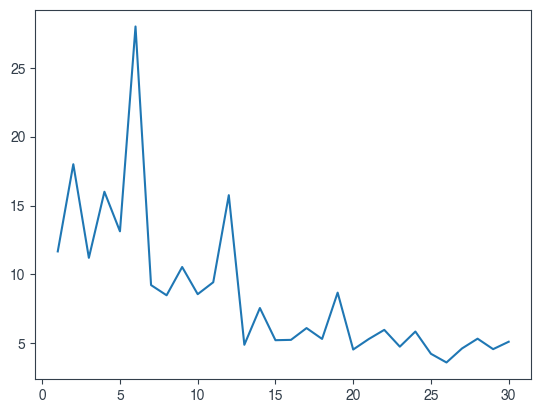

In [16]:
df['not_admitted'] = df['terapia_intensiva'] /df['deceduti_change']#-df['terapia_intensiva_change'])#/df['deceduti_change']+df['terapia_intensiva_change']
df['not_admitted'].plot()

In [17]:
actually... it looks like that the slow down is due to people struggling to find a spot in intensive care. This other plot shows that around 6 days ago, the number of deaths surpassed the number of people in intensive care, ergo as yesterday around 1300 people did not find space in hospital...

SyntaxError: invalid syntax (<ipython-input-17-baa956565ea4>, line 1)

In [ ]:
plt.style.use('default')

fig,ax=plt.subplots(figsize=(8,4))

df['log_not_admitted_ratio']=np.log2(df['not_admitted_ratio'])
ax = lollipop_plot(df, ax, date_col='data',
                   value_col='log_not_admitted_ratio')

ax.axhline(0, xmin=0.05,xmax=0.95,
           linewidth=2,
           color='r',alpha=0.6,label='Doom Line')

plt.xlabel('Date', fontsize='12')
plt.ylabel('Log2 Deaths / Intensive Care', fontsize='12')
plt.title('Excluded From Intensive Care', fontsize='14')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.9), title='Legend')
plt.tight_layout()
plt.savefig('Fig2.png')
plt.show()

In [ ]:
plt.style.use('default')
fig,ax=plt.subplots(figsize=(8,4))
df['not_admitted']=df['not_admitted'].clip(lower=0)
ax = lollipop_plot(df, ax, date_col='data',
                   value_col='not_admitted')

plt.xlabel('Date', fontsize='12')
plt.ylabel('Deaths', fontsize='12')
plt.title('Excluded From Intensive Care', fontsize='14')

#plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.9), title='Legend')
plt.savefig('Fig3.png')
plt.show()

In [ ]:
allDf = pd.read_csv('deaths_global.csv')
temp = allDf[(allDf['Country/Region']=='United Kingdom') & (allDf['Lat']==55.3781)  ]
uk_df =  get_country_data(temp)   
_DEATH_START=10

plt.style.use('ggplot')
fig,axes=plt.subplots(figsize=(16,8),ncols=2)
ax=axes[0]
y='Death_change_log'
uk_df=uk_df[uk_df['Death']>=_DEATH_START]
sns.regplot(x=np.arange(0,uk_df.shape[0]),
            y=y, color="black", data=uk_df,ax=ax,label='UK',
            scatter_kws={'s':10,'marker':'x'},)

y='deceduti_daily_log'
#temp = df[df['data']<'2020-03-13']
temp = df[~df[y].isna()]
temp = temp[temp['deceduti']>=_DEATH_START]
temp = temp.iloc[:uk_df.shape[0]]

sns.regplot(x=np.arange(0,temp.shape[0]),
            y=y, color="r", data=temp,ax=ax,
            label='Italy',scatter_kws={'s':10})

ax.set_xlim(-1,uk_df.shape[0])
ax.set_xlabel('Days After More Of {_DEATH_START} Deaths Reported'.format(_DEATH_START=_DEATH_START)
              , fontsize='16')
ax.set_ylabel('Deaths (log10)',fontsize='16')
ax.set_title('Death Rate UK/IT',fontsize='18')
ax.legend(title='Country',fontsize=12,loc=2)
ax.set_ylim(0,3.5)
xmin,xmax=ax.get_xlim()
ax.set_xlim(xmin,xmax+1)


temp = allDf[(allDf['Country/Region']=='Spain')]
spain_df =  get_country_data(temp)
spain_df=spain_df[spain_df['Death']>=_DEATH_START]
spain_df = spain_df.iloc[:uk_df.shape[0]]
ax=axes[1]
y='Death_change_log'
sns.regplot(x=np.arange(0,uk_df.shape[0]),
            y=y, color="black", data=uk_df,ax=ax,label='UK',
            scatter_kws={'s':10,'marker':'x'},)

sns.regplot(x=np.arange(0,spain_df.shape[0]),
            y=y, color="blue", data=spain_df,ax=ax,label='Spain',
            scatter_kws={'s':10,'marker':'x'},)


ax.set_xlim(-1,uk_df.shape[0])
ax.set_xlabel('Days After More Of {_DEATH_START} Deaths Reported'.format(_DEATH_START=_DEATH_START)
              , fontsize='16')
ax.set_ylabel('Deaths (log10)',fontsize='16')
ax.set_title('Death Rate UK/SPAIN',fontsize='18')
ax.legend(title='Country',fontsize=12,loc=2)
ax.set_ylim(0,4)

xmin,xmax=ax.get_xlim()
ax.set_xlim(xmin,xmax+1)
plt.savefig('Fig4.png')
plt.show()